In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error
from math import sqrt

from time import time

from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve



# Load the Dataset Wine

In [2]:
wine = pd.read_csv("Datasets/winequality/winequality-red.csv", sep=';')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Preorcessing 
## 1) simplest method for the target coloum is to seperate the quality in good or bad (0,1) 

In [6]:
wine_GB = wine
bins = (2, 6.5, 8) # stets the cut which diveide the values in 0 or 1
group_names = ["bad", "good"]
wine_GB["quality"] = pd.cut(wine_GB["quality"], bins = bins, labels = group_names)
#wine["quality"].unique()
label_quality = LabelEncoder()

wine_GB["quality"] = label_quality.fit_transform(wine_GB["quality"])

In [7]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [8]:
wine_GB["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

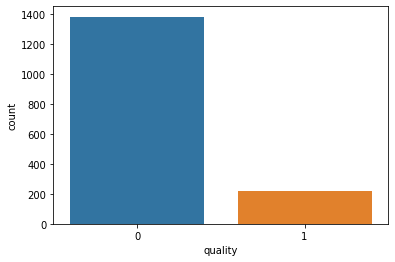

In [9]:
sns.countplot(wine["quality"])
plt.savefig("figures//wine//preprocessing//quality_1")

In [10]:
X = wine.drop("quality", axis=1)
y = wine_GB["quality"]

# Stale the dataset differenty

In [11]:

X_train_GB, X_valid_GB, Y_train, Y_valid = train_test_split(X, y, test_size = 0.3)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_GB)
X_train_GB_SC = scaler.transform(X_train_GB)
X_valid_GB_SC = scaler.transform(X_valid_GB)


from sklearn.preprocessing import normalize
X_train_GB_N = normalize(X_train_GB, norm='l2')
X_valid_GB_N = normalize(X_valid_GB, norm='l2')


from sklearn.preprocessing import StandardScaler,PowerTransformer,QuantileTransformer
quantile_transformer = QuantileTransformer(random_state=0)
X_train_GB_QT = quantile_transformer.fit_transform(X_train_GB)
X_valid_GB_QT = quantile_transformer.transform(X_valid_GB)


In [12]:
X_valid_GB_N.shape

(480, 11)

In [13]:
feats = wine.columns[2:]
feats
num_feats = len(feats)
num_feats

10

In [14]:
import itertools

# Confusion matrix 
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Reds) :
    """classes are the possible classes, so e.g ["B","M"], s.t. the ordering matches the encoding"""
    plt.rcParams.update({'font.size': 12})
    num_samples = 1
    if normalize:
        num_samples = np.sum(cm)
    print("#",num_samples)
    plt.imshow(cm, interpolation = "nearest", cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2
    # itertools.product() gives all combinations of the iterables
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        string = cm[i, j]
        if normalize:
            string /= num_samples
            string = f"{string:.2f}"
        plt.text(j, i, string, horizontalalignment = "center", color="black", backgroundcolor="white")#= "white" if cm[i, j] > thresh else "black", )
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
# Show metrics 
def show_metrics(cm):
    """also returns the metrics as dict"""
    tn = cm[0,0]
    tp = cm[1,1]

    fp = cm[0,1]
    fn = cm[1,0]

    acc = (tp+tn) / (tp+tn+fp+fn)
    prec = tp / (tp+fp)
    rec = tp / (tp+fn)
    f1 = 2 * (prec * rec) / (prec + rec)
    print(f"Accuracy  =     {acc:.3f}")
    print(f"Precision =     {prec:.3f}")
    print(f"Recall    =     {rec:.3f}")
    print(f"F1_score  =     {f1:.3f}")
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

In [15]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Cross val metric
def cross_val_metrics(model, X, y, cv=5, explain=False, show=True):
    scores = ["accuracy", "precision", "recall"]
    metrics = {}
    for sc in scores:
        scores = cross_val_score(model, X, y, cv=cv, scoring=sc)
        if show:
            print(f"[{sc}] : {scores.mean():0.5f} (+/- {scores.std():0.5f})")
        metrics[sc] = scores.mean()
    metrics["f1"] = 2 * (metrics["recall"] * metrics["precision"])/(metrics["recall"] +  metrics["precision"])
    f1 = metrics["f1"]
    if show:
        print(f"[f1] :  {f1}")
    if explain:
        print("")
        for key in metrics_explanation:
            print(metrics_explanation[key])
    return metrics

In [16]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', label="purely random") # dashed diagonal

In [17]:
results = pd.DataFrame(columns=["model", "accuracy", "precision", "recall", "f1", "traintime"])

In [18]:
def train_models_GB_N(clfs, model_type, model_var, x=X_train_GB_N, y=Y_train):
    cms = []
    roc_curves = []
    res_list = []
    for i, (clf, name, params) in enumerate(clfs):
        
        print("params:", params.values())
        start = time()
        #clf.fit(x, y)
        Y_probas = cross_val_predict(clf, x, y, cv=5, method="predict_proba")
        traintime = time() - start
        Y_scores = Y_probas[:, 1] # score = proba of positive class
        fpr, tpr, thresholds = roc_curve(y, Y_scores)
        roc_curves.append((fpr, tpr))
        plot_roc_curve(fpr, tpr, f"{name}_{i}")
        #mets = dict{}
        mets = cross_val_metrics(clf, x, y, explain=False, show=False)
        mets["model"] = f"{name}_{i}"
        mets["traintime"] = traintime
        #metrics[model_type][model_var]
                    
        #Y_pred = clf.predict(x)
        Y_pred = cross_val_predict(clf, x, y, cv=5)
        cms.append(confusion_matrix(y, Y_pred))
        res_list.append(mets)
    keys = ["model", "accuracy", "precision", "recall", "f1", "traintime"]
    res_df = pd.DataFrame([[ele[key] for key in keys] for ele in res_list])
    #display(res)
    res_df.columns=results.columns
        
    plt.legend(loc="lower right")
    plt.show()
    return cms, res_df

In [19]:
def train_models_GB_QT(clfs, model_type, model_var, x=X_train_GB_QT, y=Y_train):
    cms = []
    roc_curves = []
    res_list = []
    for i, (clf, name, params) in enumerate(clfs):
        
        print("params:", params.values())
        start = time()
        #clf.fit(x, y)
        Y_probas = cross_val_predict(clf, x, y, cv=5, method="predict_proba")
        traintime = time() - start
        Y_scores = Y_probas[:, 1] # score = proba of positive class
        fpr, tpr, thresholds = roc_curve(y, Y_scores)
        roc_curves.append((fpr, tpr))
        plot_roc_curve(fpr, tpr, f"{name}_{i}")
        #mets = dict{}
        mets = cross_val_metrics(clf, x, y, explain=False, show=False)
        mets["model"] = f"{name}_{i}"
        mets["traintime"] = traintime
        #metrics[model_type][model_var]
                    
        #Y_pred = clf.predict(x)
        Y_pred = cross_val_predict(clf, x, y, cv=5)
        cms.append(confusion_matrix(y, Y_pred))
        res_list.append(mets)
    keys = ["model", "accuracy", "precision", "recall", "f1", "traintime"]
    res_df = pd.DataFrame([[ele[key] for key in keys] for ele in res_list])
    #display(res)
    res_df.columns=results.columns
        
    plt.legend(loc="lower right")
    plt.show()
    return cms, res_df

In [20]:
def train_models_GB_SC(clfs, model_type, model_var, x=X_train_GB_SC, y=Y_train):
    cms = []
    roc_curves = []
    res_list = []
    for i, (clf, name, params) in enumerate(clfs):
        
        print("params:", params.values())
        start = time()
        #clf.fit(x, y)
        Y_probas = cross_val_predict(clf, x, y, cv=5, method="predict_proba")
        traintime = time() - start
        Y_scores = Y_probas[:, 1] # score = proba of positive class
        fpr, tpr, thresholds = roc_curve(y, Y_scores)
        roc_curves.append((fpr, tpr))
        plot_roc_curve(fpr, tpr, f"{name}_{i}")
        #mets = dict{}
        mets = cross_val_metrics(clf, x, y, explain=False, show=False)
        mets["model"] = f"{name}_{i}"
        mets["traintime"] = traintime
        #metrics[model_type][model_var]
                    
        #Y_pred = clf.predict(x)
        Y_pred = cross_val_predict(clf, x, y, cv=5)
        cms.append(confusion_matrix(y, Y_pred))
        res_list.append(mets)
    keys = ["model", "accuracy", "precision", "recall", "f1", "traintime"]
    res_df = pd.DataFrame([[ele[key] for key in keys] for ele in res_list])
    #display(res)
    res_df.columns=results.columns
        
    plt.legend(loc="lower right")
    plt.show()
    return cms, res_df

In [21]:
def plot_cm_per_model(cms, clfs):
    for i, (cm, (clf, name, params)) in enumerate(zip(cms,clfs)):
        plt.clf()
        plot_confusion_matrix(cm, ["B", "G"], normalize=True, title=f"Confusion matrix: {name}", cmap=plt.cm.Reds)
        plt.savefig(f"figures//wine//confusion_matrices//CM_{name}_{i}.png")

In [22]:
def make_mlp_models(alphas,modes,solv, h,maxiter):
    models_ret = []
    for g in h:
        for i in alphas:
            for j in modes:
                for k in solv:
                    models_ret.append(MLPClassifier(hidden_layer_sizes=(g), max_iter=maxiter, alpha=i,solver=k,activation=j,tol = 1e-9))
    return models_ret

In [23]:
def MLP_Search(alphas,modes,solv, h,maxiter,X_train, X_valid, Y_train, Y_valid):
    erg = []
    for g in h:
        for i in alphas:
            for j in modes:
                for k in solv:
                    clf = MLPClassifier(hidden_layer_sizes=(g), max_iter=maxiter, alpha=i,solver=k,activation=j,tol = 1e-9)
                    traintime = time()
                    clf.fit(X_train, Y_train)
                    traintime = time() - traintime
                    Y_pred = clf.predict(X_valid)
                    print("Hidden layers: ",g,"|\talpha: ",i,"|\tmode: ",j,"|\tsolver: ",k,"|\tscore: ",accuracy_score(Y_valid, Y_pred), "|\ttraintime:", traintime)
                    erg.append({
                        "h": g,
                        "alpha": i,
                        "mode": j,
                        "solver": k,
                        "score": accuracy_score(Y_valid, Y_pred),
                        "traintime": traintime})
        print("")
    return erg

In [24]:
from sklearn.metrics import mean_squared_error
def Statistic(Y_valid,Y_pred,name):
    print("Heat map: ")
    plt.figure()
    cm = confusion_matrix(Y_valid, Y_pred)
    plot_confusion_matrix(cm, ["B", "G"], normalize=True, title=f"Confusion matrix: {name}", cmap=plt.cm.Reds)
    plt.savefig(f"figures//wine//confusion_matrices//CM_{name}.png")
    #sns.heatmap(cm, center=True)
    #plt.savefig("Heatmap {}".format(name))
    plt.figure()
    sns.distplot(Y_valid)
    sns.distplot(Y_pred, color="red")
    plt.savefig("figures//wine//statistics//difference between prediction and validation {}".format(name))

    plt.figure()
    sns.distplot(Y_valid-Y_pred)
    plt.savefig("figures//wine//statistics//total difference between prediction and validation {}".format(name))
    print(sqrt(mean_squared_error(Y_valid, Y_pred)))

    Y_pred_Norm = Y_pred / np.linalg.norm(Y_pred)
    Y_valid_Norm = Y_valid / np.linalg.norm(Y_valid)

    print(sqrt(mean_squared_error(Y_pred_Norm, Y_valid_Norm)))
    return cm

In [25]:
def FindBestScore(results):
    best_score = 0
    best_index = 0
    for i, res in enumerate(results):
        if res["score"] > best_score:
            best_score = res["score"]
            best_index = i
    print("best_score:", best_score)
    print("best_params:", results[best_index])
    return results[best_index]

In [26]:
def plotLC(LC,best_params):
    plt.figure()
    plt.plot(LC)#,label="activation {} Hidden Layers {} solver {} ".format(best_params["alpha"],i,l))
    plt.grid()
    plt.legend()
    plt.xlabel("Iterations")
    plt.xlabel("Loss")
    plt.title("activation {} Hidden Layers {} solver {} ".format(best_params["mode"],best_params["h"],best_params["solver"]))
    plt.savefig("figures//wine//LC//activation {} Hidden Layers {} solver {} ".format(best_params["mode"],best_params["h"],best_params["solver"]))


In [27]:
def find_best_score(metrics, target="accuracy"):
    best_target = 0
    best_index = 0
    for idx, met in enumerate(metrics):
        if met[target] > best_target:
            best_target = met[target]
            best_index = idx
    return best_target, metrics[best_index], best_index

In [28]:
alphas = [1e-5,1e-4,1e-3,1e-1,1,10]
alphas = [1e-5,1e-4,1e-3]
activation = ["identity"]
activation = ["relu","identity"]
solver = ["adam"]
h = [11,20]
maxiter = 1000

# Normalize

## Random Forest

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

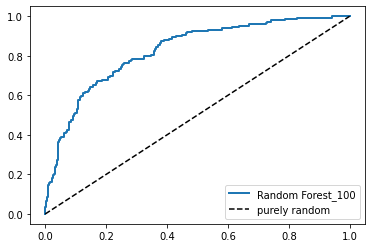

In [30]:
model_name = "RF"
variation = "normalized"

n_estimators = 100
max_features = "auto"
if isinstance(max_features, int):
    print("num features per tree: ", max_features*num_features)
max_depth = 4
min_samples_leaf = 1 # default
min_samples_split = 2 #default
criterion = "gini" # 

# Let's check out a default first
clf_N = RFC(n_jobs=-1, criterion=criterion , bootstrap=True, oob_score=True, n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, verbose=0,)
start = time()
clf_N.fit(X_train_GB_N, Y_train)
traintime = time() - start
Y_probas = cross_val_predict(clf_N, X_train_GB_N, Y_train, cv=5, method="predict_proba")

Y_scores = Y_probas[:, 1] # score = proba of positive class
fpr, tpr, thresholds = roc_curve(Y_train, Y_scores)

plot_roc_curve(fpr, tpr, f"Random Forest_{n_estimators}")
plt.legend(loc="lower right")
plt.show()

[accuracy] : 0.86863 (+/- 0.00352)
[precision] : 0.60000 (+/- 0.48990)
[recall] : 0.02000 (+/- 0.02667)
[f1] :  0.03870967741935484
Accuracy  =     0.867
Precision =     0.500
Recall    =     0.020
F1_score  =     0.039
# 1119


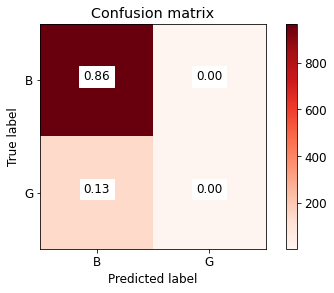

In [85]:
start = time()
mets = cross_val_metrics(clf_N, X_train_GB_N, Y_train, explain=False)
evaltime = time() - start

#Y_pred = clf.predict(X_train)
Y_pred = cross_val_predict(clf_N, X_train_GB_N, Y_train, cv=5)
cm_rf_N = confusion_matrix(Y_train, Y_pred)
show_metrics(cm_rf_N)
plot_confusion_matrix(cm_rf_N, ["B", "G"], normalize = True, title = "Confusion matrix", cmap = plt.cm.Reds)
#plt.savefig("CM_RF_110_entropy.png")

# 1119
Accuracy  =     0.870
Precision =     1.000
Recall    =     0.020
F1_score  =     0.039


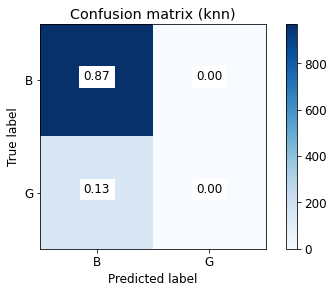

In [32]:
plot_confusion_matrix(cm_rf_N,  ["B", "G"],
                          normalize = True,
                          title = 'Confusion matrix (knn)',
                          cmap = plt.cm.Blues)
metrics_rf_N = show_metrics(cm_rf_N)

In [33]:
model_name = "RF"
variation = "reduced"

print(f"traintime: {traintime}s")
#traintimes[model_name][variation] = traintime
#metrics[model_name][variation] = mets
#matrices[model_name][variation] = cm_rf
#models[model_name][variation] = clf
#evaltimes[model_name][variation] = evaltime
#print(f"Evaluation time: {evaltime}s")

traintime: 0.4372551441192627s


80 5 4
80 5 8
80 9 4
80 9 8
120 5 4
120 5 8
120 9 4
120 9 8
200 5 4
200 5 8
200 9 4
200 9 8
# 12 different combinations
params: dict_values([80, 4, 'auto', 5])
params: dict_values([80, 8, 'auto', 5])
params: dict_values([80, 4, 'auto', 9])
params: dict_values([80, 8, 'auto', 9])
params: dict_values([120, 4, 'auto', 5])
params: dict_values([120, 8, 'auto', 5])
params: dict_values([120, 4, 'auto', 9])
params: dict_values([120, 8, 'auto', 9])
params: dict_values([200, 4, 'auto', 5])
params: dict_values([200, 8, 'auto', 5])
params: dict_values([200, 4, 'auto', 9])
params: dict_values([200, 8, 'auto', 9])


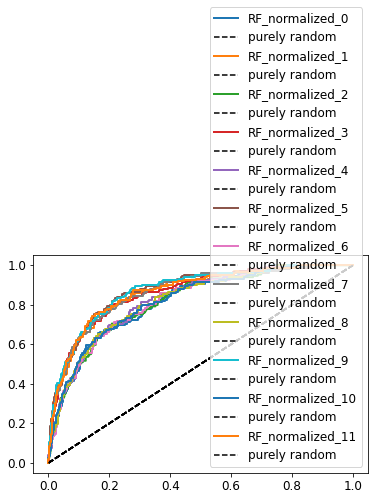

In [96]:
model_name = "RF"
variation = "normalized"

n_estimators = [80,120,200]
max_depth = [4,8]
min_samples_split = [2,5]
max_features = [int(0.5*num_feats), num_feats-1]

models_rf = []
params = {"n_estimators": None, "max_depth": None, "max_features": None, "min_samples_split": None}
for i,j,k in itertools.product(n_estimators, max_features, max_depth):
    print(i,j,k)
    params["n_estimators"]= i
    params["max_features"] = "auto"
    params["min_samples_split"] = j
    params["max_depth"] = k
    models_rf.append(
        (   RFC(n_jobs=-1, bootstrap=True, oob_score=True, n_estimators=i, max_features=int(j), max_depth=k, verbose=0),
            model_name+"_"+variation, 
            params.copy())
    )
print(f"# {len(models_rf)} different combinations")
cms_rf_GB_N, res_rf_GB_N = train_models_GB_N(models_rf, model_name, variation) 

In [97]:
models_rf_reduced = models_rf
res_rf_GB_N

,model,accuracy,precision,recall,f1,traintime
0,RF_normalized_0,0.870420,0.833333,0.046897,0.088796,3.922363
1,RF_normalized_1,0.887388,0.719048,0.261839,0.383887,2.302073
2,RF_normalized_2,0.871316,0.695714,0.087126,0.154859,2.591539
3,RF_normalized_3,0.885610,0.647955,0.288736,0.399465,2.497396
4,RF_normalized_4,0.869527,0.500000,0.040230,0.074468,2.524439
5,RF_normalized_5,0.886495,0.784524,0.282069,0.414947,2.742486
6,RF_normalized_6,0.867733,0.700000,0.073563,0.133135,2.797375
7,RF_normalized_7,0.882031,0.659524,0.295402,0.408042,3.146799
8,RF_normalized_8,0.870420,0.733333,0.046897,0.088156,3.555170
9,RF_normalized_9,0.885590,0.752454,0.274943,0.402730,3.902403


<Figure size 576x432 with 0 Axes>

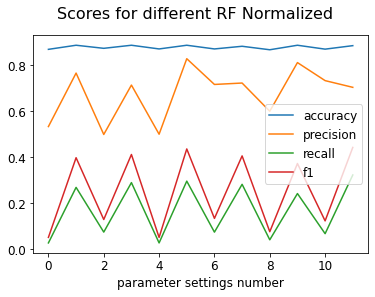

In [76]:
cols_scores = ["accuracy" , "precision", "recall", "f1"]
plt.figure(figsize=(8,6))
#plt.rcParams.update({'font.size': 14})
res_rf_GB_N[cols_scores].plot(fontsize=12)
plt.suptitle("Scores for different RF Normalized", fontsize=16)
plt.xlabel("parameter settings number")
plt.savefig("figures//wine//scores_rf_N.png")

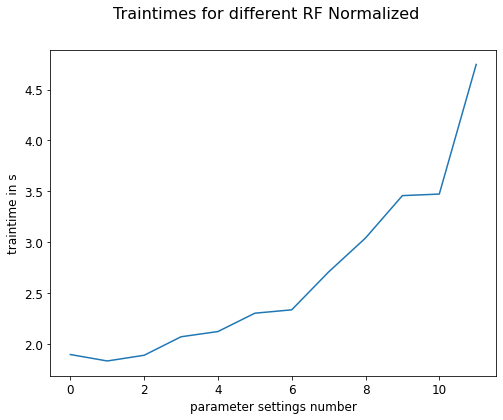

In [77]:
plt.figure(figsize=(8,6))
#plt.rcParams.update({'font.size': 14})
res_rf_GB_N["traintime"].plot(fontsize=12)
plt.suptitle("Traintimes for different RF Normalized", fontsize=16)
plt.xlabel("parameter settings number")
plt.ylabel("traintime in s")
plt.savefig("figures//wine//time_rf_N.png")

# 1119
# 1119
# 1119
# 1119
# 1119
# 1119
# 1119
# 1119
# 1119
# 1119
# 1119
# 1119


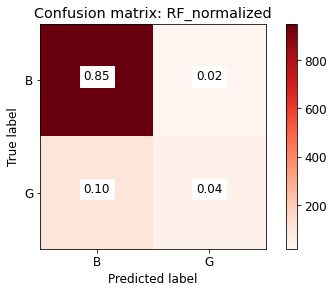

In [100]:
plot_cm_per_model(cms_rf_GB_N, models_rf_reduced)

## Multi-Layer-Perceptron

In [43]:
from sklearn.neural_network import MLPClassifier

In [44]:
results_B = MLP_Search(alphas,activation,solver,h,maxiter,X_train_GB_N, X_valid_GB_N, Y_train, Y_valid)
best_params_GB_N = FindBestScore(results_B)

Hidden layers:  11 |	alpha:  1e-05 |	mode:  relu |	solver:  adam |	score:  0.8583333333333333 |	traintime: 3.358323574066162
Hidden layers:  11 |	alpha:  1e-05 |	mode:  identity |	solver:  adam |	score:  0.8583333333333333 |	traintime: 2.491494655609131
Hidden layers:  11 |	alpha:  0.0001 |	mode:  relu |	solver:  adam |	score:  0.8604166666666667 |	traintime: 3.0612001419067383
Hidden layers:  11 |	alpha:  0.0001 |	mode:  identity |	solver:  adam |	score:  0.85625 |	traintime: 2.444143772125244
Hidden layers:  11 |	alpha:  0.001 |	mode:  relu |	solver:  adam |	score:  0.8645833333333334 |	traintime: 3.0510764122009277
Hidden layers:  11 |	alpha:  0.001 |	mode:  identity |	solver:  adam |	score:  0.8541666666666666 |	traintime: 2.4974873065948486

Hidden layers:  20 |	alpha:  1e-05 |	mode:  relu |	solver:  adam |	score:  0.8625 |	traintime: 3.2415876388549805
Hidden layers:  20 |	alpha:  1e-05 |	mode:  identity |	solver:  adam |	score:  0.85625 |	traintime: 2.6383721828460693
Hidden lay

Heat map: 
# 480
No handles with labels found to put in legend.
0.37080992435478316
0.05721402685574083


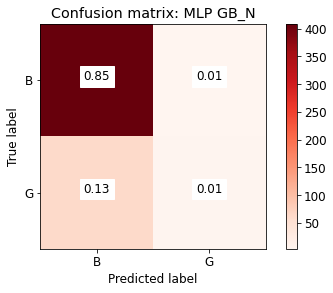

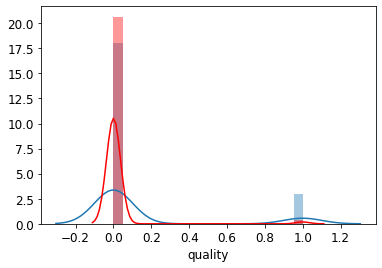

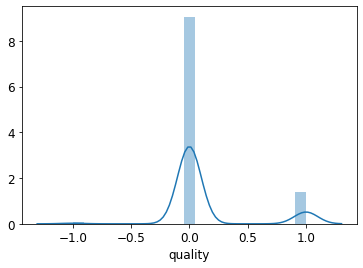

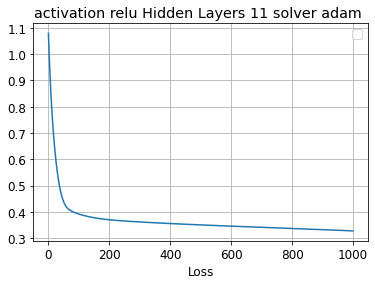

In [45]:
mlp_N = MLPClassifier(hidden_layer_sizes=(best_params_GB_N["h"]), max_iter=maxiter, alpha=best_params_GB_N["alpha"],solver=best_params_GB_N["solver"],activation=best_params_GB_N["mode"],tol=1e-9,verbose=False)
mlp_N.fit(X_train_GB_N, Y_train)
LC = mlp_N.loss_curve_
Y_pred_GB_N = mlp_N.predict(X_valid_GB_N)
Statistic(Y_valid,Y_pred_GB_N,"MLP GB_N")
plotLC(LC,best_params_GB_N)
cm_mlp_N = confusion_matrix(Y_valid, Y_pred_GB_N)

# 480
Accuracy  =     0.863
Precision =     0.625
Recall    =     0.074
F1_score  =     0.132


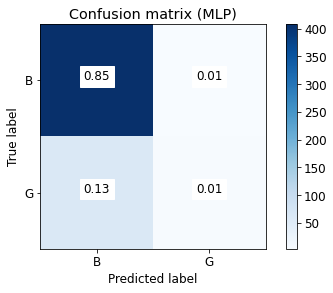

In [46]:
plot_confusion_matrix(cm_mlp_N, ["B", "G"],
                          normalize = True,
                          title = 'Confusion matrix (MLP)',
                          cmap = plt.cm.Blues)
metrics_mlp_N = show_metrics(cm_mlp_N)

11 1e-05 relu
11 1e-05 identity
11 0.0001 relu
11 0.0001 identity
11 0.001 relu
11 0.001 identity
20 1e-05 relu
20 1e-05 identity
20 0.0001 relu
20 0.0001 identity
20 0.001 relu
20 0.001 identity
# 12 different combinations
params: dict_values([None, 11, None, 'auto', 1e-05, 'relu'])
params: dict_values([None, 11, None, 'auto', 1e-05, 'identity'])
params: dict_values([None, 11, None, 'auto', 0.0001, 'relu'])
params: dict_values([None, 11, None, 'auto', 0.0001, 'identity'])
params: dict_values([None, 11, None, 'auto', 0.001, 'relu'])
params: dict_values([None, 11, None, 'auto', 0.001, 'identity'])
params: dict_values([None, 20, None, 'auto', 1e-05, 'relu'])
params: dict_values([None, 20, None, 'auto', 1e-05, 'identity'])
params: dict_values([None, 20, None, 'auto', 0.0001, 'relu'])
params: dict_values([None, 20, None, 'auto', 0.0001, 'identity'])
params: dict_values([None, 20, None, 'auto', 0.001, 'relu'])
params: dict_values([None, 20, None, 'auto', 0.001, 'identity'])


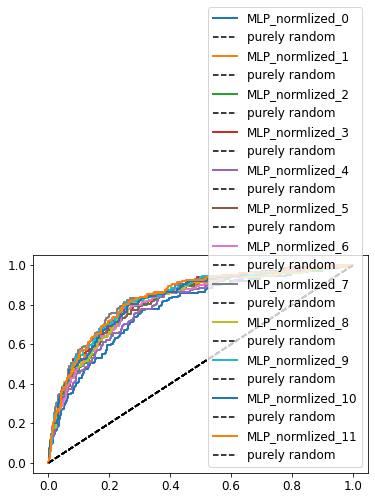

In [87]:
model_name = "MLP"
variation = "normlized"

models_mlp = []
params = {"h": None, "alphas": None, "activations": None}
for i,j,k in itertools.product(h, alphas, activation):
    print(i,j,k)
    params["alphas"]= i
    params["activation"] = "auto"
    params["min_samples_split"] = j
    params["max_depth"] = k
    models_mlp.append(
        (MLPClassifier(hidden_layer_sizes=(i), max_iter=maxiter, alpha=j,solver="adam",activation=k,tol = 1e-9),
         model_name+"_"+variation, 
         params.copy())
    )
print(f"# {len(models_mlp)} different combinations")

cms_mlp_GB_N, res_mlp_GB_N = train_models_GB_N(models_mlp, model_name, variation, x=X_train_GB_N, y=Y_train)   
models_mlp_reduced = models_mlp

#cms_mlp_nodrop, res_mlp_nodrop = train_models(models_mlp, model_name, variation, x=X_train_nodrop, y=Y_train_nodrop)   
#models_mlp_full = models_mlp

In [88]:
res_mlp_GB_N

,model,accuracy,precision,recall,f1,traintime
0,MLP_normlized_0,0.872205,0.753333,0.074023,0.134800,12.953182
1,MLP_normlized_1,0.871316,0.667033,0.100920,0.175315,11.232172
2,MLP_normlized_2,0.867741,0.593333,0.073333,0.130533,14.303636
3,MLP_normlized_3,0.872209,0.740952,0.107586,0.187891,12.648879
4,MLP_normlized_4,0.873102,0.526667,0.067126,0.119076,12.173710
5,MLP_normlized_5,0.868630,0.672619,0.160920,0.259706,11.419142
6,MLP_normlized_6,0.874892,0.664286,0.148506,0.242744,13.671723
7,MLP_normlized_7,0.881150,0.665128,0.208736,0.317752,11.286747
8,MLP_normlized_8,0.873110,0.711667,0.114253,0.196896,13.726252
9,MLP_normlized_9,0.879364,0.697273,0.215402,0.329130,12.543358


<Figure size 576x432 with 0 Axes>

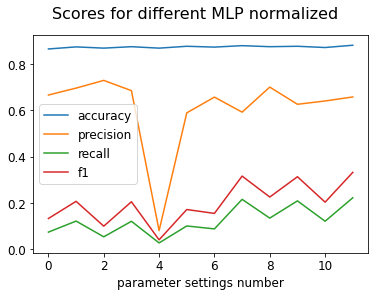

In [78]:
cols_scores = ["accuracy" , "precision", "recall", "f1"]
plt.figure(figsize=(8,6))
#plt.rcParams.update({'font.size': 14})
res_mlp_GB_N[cols_scores].plot(fontsize=12)
plt.suptitle("Scores for different MLP normalized", fontsize=16)
plt.xlabel("parameter settings number")
plt.savefig("figures//wine//scores_mlp_N.png")

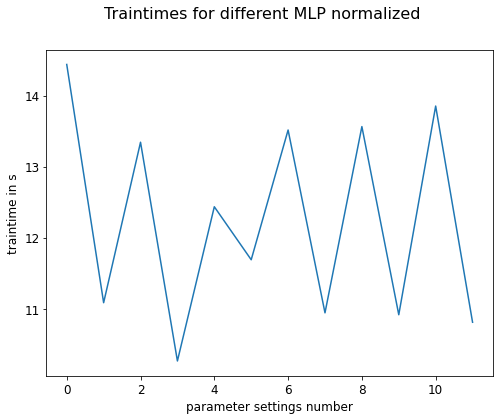

In [79]:
plt.figure(figsize=(8,6))
#plt.rcParams.update({'font.size': 14})
res_mlp_GB_N["traintime"].plot(fontsize=12)
plt.suptitle("Traintimes for different MLP normalized", fontsize=16)
plt.xlabel("parameter settings number")
plt.ylabel("traintime in s")
plt.savefig("figures//wine//time_mlp_N.png")

# 1119
# 1119
# 1119
# 1119
# 1119
# 1119
# 1119
# 1119
# 1119
# 1119
# 1119
# 1119


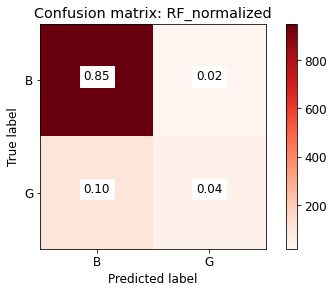

In [101]:
plot_cm_per_model(cms_rf_GB_N, models_rf_reduced)

In [102]:
cms_rf_GB_N, res_rf_GB_N = train_models_GB_N(models_rf, model_name, variation)

params: dict_values([80, 4, 'auto', 5])
params: dict_values([80, 8, 'auto', 5])


KeyboardInterrupt: 

## knn

In [89]:
# KNN Test
from sklearn.neighbors import KNeighborsClassifier

scores = []
best_score = 0
best_ks = []
ks = list(range(1, 10)) + list(range(10, 20, 2)) + list(range(20, 51, 4))
for k in ks:
    knn_N = KNeighborsClassifier(n_neighbors=k)
    knn_N.fit(X_train_GB_N, Y_train)
    Y_pred = knn_N.predict(X_train_GB_N)
    score = accuracy_score(Y_train, Y_pred)
    scores.append(score)
    best_score = max(scores)
    if score == best_score:
        best_ks.append(k)
    score
best_score
best_ks.pop(0)
#best_ks.pop(0)
#best_ks

1

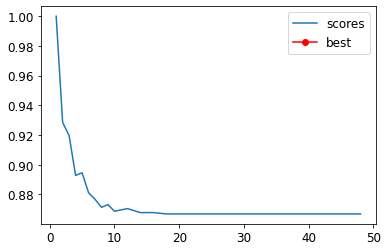

In [90]:
plt.plot(ks, scores, label="scores")
plt.plot(best_ks, [best_score]*len(best_ks), marker="o", color="red",label="best")
plt.legend()

In [91]:
knn_N = KNeighborsClassifier(n_neighbors=5)
knn_N.fit(X_train_GB_N, Y_train)
Y_pred = knn_N.predict(X_train_GB_N)
score_knn_N = accuracy_score(Y_train, Y_pred)
cm_knn_N = confusion_matrix(Y_train, Y_pred)
cm_knn_N

array([[950,  20],
       [ 98,  51]])

In [92]:
# On train set
print("train set")
cross_val_metrics(knn_N, X_train_GB_N, Y_train)
# On traination set
print("-"*30)
print("traination set")
cross_val_metrics(knn_N, X_train_GB_N, Y_train)
# B...1 --> 66%
# M...0 --> 33%

train set
[accuracy] : 0.85613 (+/- 0.01230)
[precision] : 0.39636 (+/- 0.11622)
[recall] : 0.14115 (+/- 0.04497)
[f1] :  0.20816796267496113
------------------------------
traination set
[accuracy] : 0.85613 (+/- 0.01230)
[precision] : 0.39636 (+/- 0.11622)
[recall] : 0.14115 (+/- 0.04497)
[f1] :  0.20816796267496113


{'accuracy': 0.8561338885329917,
 'precision': 0.39636363636363636,
 'recall': 0.14114942528735633,
 'f1': 0.20816796267496113}

# 1119
Accuracy  =     0.895
Precision =     0.718
Recall    =     0.342
F1_score  =     0.464


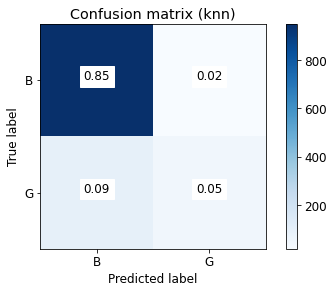

In [93]:
plot_confusion_matrix(cm_knn_N,  ["B", "G"],
                          normalize = True,
                          title = 'Confusion matrix (knn)',
                          cmap = plt.cm.Blues)
metrics_knn_N = show_metrics(cm_knn_N)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40, 44, 48]


<Figure size 432x288 with 0 Axes>

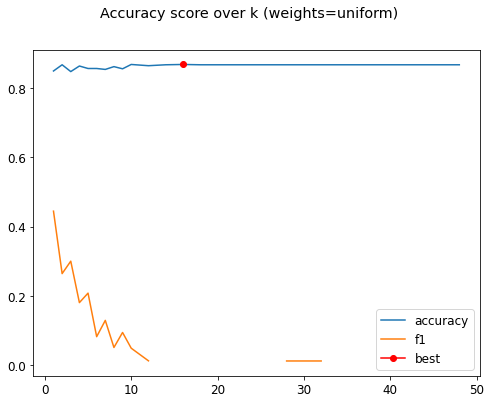

<Figure size 432x288 with 0 Axes>

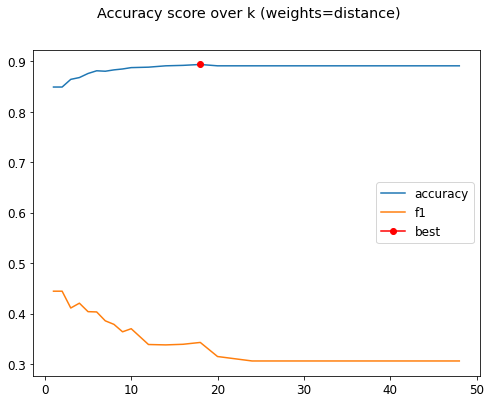

In [103]:
# KNN Test
from sklearn.neighbors import KNeighborsClassifier

ks = list(range(1, 10)) + list(range(10, 20, 2)) + list(range(20, 51, 4))
print(ks)
weights = ["uniform", "distance"]
metrics = []
for weight in weights:
    scores = []
    mets = []
    best_ks = []
    best_k = 0
    best_score = 0
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        #knn.fit(X_train, Y_train)
        #Y_pred = knn.predict(X_valid)
        #score = accuracy_score(Y_valid, Y_pred)
        metric = cross_val_metrics(knn, X_train_GB_N, Y_train, cv=5, show=False)
        mets.append(metric)
        score = metric["accuracy"]
        scores.append(score)
        #best_score = max(scores)
        if score > best_score:
            best_k = k
            best_score= score
        score
    metrics.append(mets)
    best_score
    best_ks
    plt.clf()
    plt.figure(figsize=(8,6))
    plt.suptitle("Accuracy score over k (weights={})".format(weight))
    plt.plot(ks, scores, label="accuracy")
    plt.plot(ks, [met["f1"] for met in mets], label="f1")
    plt.plot(best_k, best_score, marker="o", color="red", label="best")
    plt.legend()
    plt.savefig("figures//wine//knn//scores_k_{}_normalized".format(weight))
    plt.show()

# stanart scaler

## Random Forest

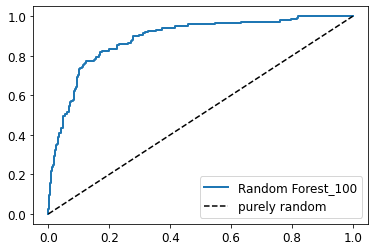

In [53]:
model_name = "RF"
variation = "reduced"

n_estimators = 100
max_features = "auto"
if isinstance(max_features, int):
    print("num features per tree: ", max_features*num_features)
max_depth = 4
min_samples_leaf = 1 # default
min_samples_split = 2 #default
criterion = "gini" # 

# Let's check out a default first
clf_SC = RFC(n_jobs=-1, criterion=criterion , bootstrap=True, oob_score=True, n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, verbose=0,)
start = time()
clf_SC.fit(X_train_GB_SC, Y_train)
traintime = time() - start
cm_rf_SC = confusion_matrix(Y_train, Y_pred)
Y_probas = cross_val_predict(clf_SC, X_train_GB_SC, Y_train, cv=5, method="predict_proba")

Y_scores = Y_probas[:, 1] # score = proba of positive class
fpr, tpr, thresholds = roc_curve(Y_train, Y_scores)

plot_roc_curve(fpr, tpr, f"Random Forest_{n_estimators}")
plt.legend(loc="lower right")
plt.show()

# 1119
Accuracy  =     0.870
Precision =     1.000
Recall    =     0.020
F1_score  =     0.039


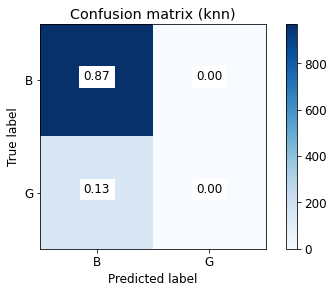

In [54]:
plot_confusion_matrix(cm_rf_SC,  ["B", "G"],
                          normalize = True,
                          title = 'Confusion matrix (knn)',
                          cmap = plt.cm.Blues)
metrics_rf_SC = show_metrics(cm_rf_SC)

[accuracy] : 0.88830 (+/- 0.01971)
[precision] : 0.76195 (+/- 0.07342)
[recall] : 0.21540 (+/- 0.08013)
[f1] :  0.3358583241646914
Accuracy  =     0.889
Precision =     0.778
Recall    =     0.235
F1_score  =     0.361
# 1119


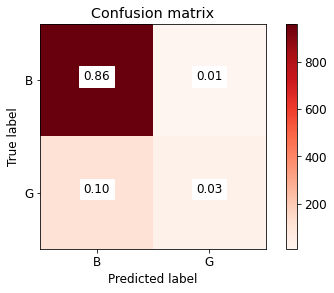

In [55]:
start = time()
mets = cross_val_metrics(clf_SC, X_train_GB_SC, Y_train, explain=False)
evaltime = time() - start

#Y_pred = clf.predict(X_train)
Y_pred = cross_val_predict(clf_SC, X_train_GB_SC, Y_train, cv=5)
cm_rf_SC = confusion_matrix(Y_train, Y_pred)
show_metrics(cm_rf_SC)
plot_confusion_matrix(cm_rf_SC, ["B", "G"], normalize = True, title = "Confusion matrix", cmap = plt.cm.Reds)
#plt.savefig("CM_RF_110_entropy.png")

80 5 4
80 5 8
80 9 4
80 9 8
120 5 4
120 5 8
120 9 4
120 9 8
200 5 4
200 5 8
200 9 4
200 9 8
# 12 different combinations
params: dict_values([80, 4, 'auto', 5])
params: dict_values([80, 8, 'auto', 5])
params: dict_values([80, 4, 'auto', 9])
params: dict_values([80, 8, 'auto', 9])
params: dict_values([120, 4, 'auto', 5])
params: dict_values([120, 8, 'auto', 5])
params: dict_values([120, 4, 'auto', 9])
params: dict_values([120, 8, 'auto', 9])
params: dict_values([200, 4, 'auto', 5])
params: dict_values([200, 8, 'auto', 5])
params: dict_values([200, 4, 'auto', 9])
params: dict_values([200, 8, 'auto', 9])


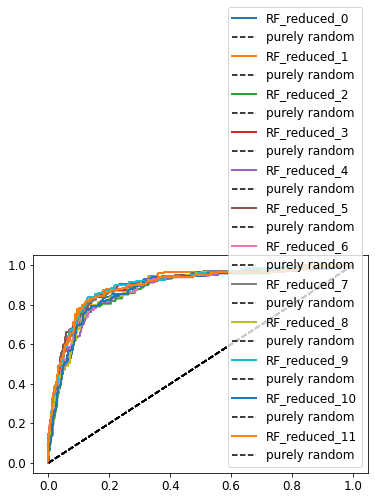

In [56]:
model_name = "RF"
variation = "standart scale"

n_estimators = [80,120,200]
max_depth = [4,8]
min_samples_split = [2,5]
max_features = [int(0.5*num_feats), num_feats-1]

models_rf = []
params = {"n_estimators": None, "max_depth": None, "max_features": None, "min_samples_split": None}
for i,j,k in itertools.product(n_estimators, max_features, max_depth):
    print(i,j,k)
    params["n_estimators"]= i
    params["max_features"] = "auto"
    params["min_samples_split"] = j
    params["max_depth"] = k
    models_rf.append(
        (   RFC(n_jobs=-1, bootstrap=True, oob_score=True, n_estimators=i, max_features=int(j), max_depth=k, verbose=0),
            model_name+"_"+variation, 
            params.copy())
    )
print(f"# {len(models_rf)} different combinations")
cms_rf_GB_SC, res_rf_GB_SC = train_models_GB_SC(models_rf, model_name, variation) 

In [57]:
models_rf_reduced = models_rf
res_rf_GB_SC

,model,accuracy,precision,recall,f1,traintime
0,RF_reduced_0,0.891864,0.740756,0.302299,0.429373,2.245044
1,RF_reduced_1,0.900801,0.685600,0.443218,0.538387,2.138269
2,RF_reduced_2,0.889182,0.650777,0.355402,0.459735,2.106699
3,RF_reduced_3,0.904372,0.645818,0.469885,0.543980,2.238255
4,RF_reduced_4,0.887392,0.672290,0.315632,0.429581,2.371578
5,RF_reduced_5,0.904372,0.720226,0.463448,0.563985,2.545580
6,RF_reduced_6,0.884717,0.657778,0.362299,0.467244,2.599152
7,RF_reduced_7,0.901682,0.676156,0.469655,0.554298,2.765153
8,RF_reduced_8,0.888289,0.676730,0.328966,0.442720,3.512025
9,RF_reduced_9,0.898114,0.694349,0.463218,0.555709,3.748618


<Figure size 576x432 with 0 Axes>

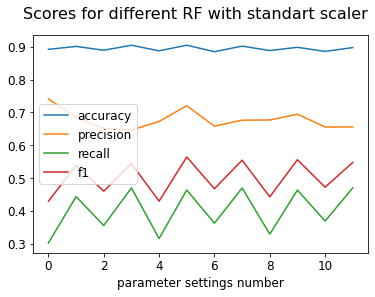

In [80]:
cols_scores = ["accuracy" , "precision", "recall", "f1"]
plt.figure(figsize=(8,6))
#plt.rcParams.update({'font.size': 14})
res_rf_GB_SC[cols_scores].plot(fontsize=12)
plt.suptitle("Scores for different RF with standart scaler", fontsize=16)
plt.xlabel("parameter settings number")
plt.savefig("figures//wine//scores_rf_SC.png")

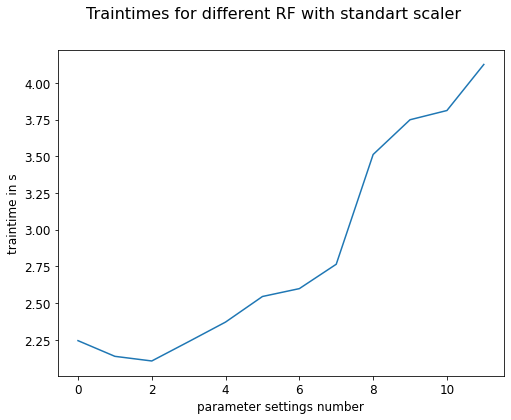

In [81]:
plt.figure(figsize=(8,6))
#plt.rcParams.update({'font.size': 14})
res_rf_GB_SC["traintime"].plot(fontsize=12)
plt.suptitle("Traintimes for different RF with standart scaler", fontsize=16)
plt.xlabel("parameter settings number")
plt.ylabel("traintime in s")
plt.savefig("figures//wine//time_rf_SC.png")

In [ ]:
plot_cm_per_model(cms_rf_GB_SC, models_rf_reduced)

## Multi-Layer-Perceptron


In [61]:
results_B = MLP_Search(alphas,activation,solver,h,maxiter,X_train_GB_SC, X_valid_GB_SC, Y_train, Y_valid)
best_params_GB_SC = FindBestScore(results_B)

Hidden layers:  11 |	alpha:  1e-05 |	mode:  relu |	solver:  adam |	score:  0.8729166666666667 |	traintime: 3.261762857437134
Hidden layers:  11 |	alpha:  1e-05 |	mode:  identity |	solver:  adam |	score:  0.8666666666666667 |	traintime: 0.705855131149292
Hidden layers:  11 |	alpha:  0.0001 |	mode:  relu |	solver:  adam |	score:  0.8708333333333333 |	traintime: 3.4643290042877197
Hidden layers:  11 |	alpha:  0.0001 |	mode:  identity |	solver:  adam |	score:  0.8625 |	traintime: 0.5150325298309326
Hidden layers:  11 |	alpha:  0.001 |	mode:  relu |	solver:  adam |	score:  0.8770833333333333 |	traintime: 3.22995662689209
Hidden layers:  11 |	alpha:  0.001 |	mode:  identity |	solver:  adam |	score:  0.8666666666666667 |	traintime: 0.6856417655944824

Hidden layers:  20 |	alpha:  1e-05 |	mode:  relu |	solver:  adam |	score:  0.8895833333333333 |	traintime: 3.4675774574279785
Hidden layers:  20 |	alpha:  1e-05 |	mode:  identity |	solver:  adam |	score:  0.8645833333333334 |	traintime: 0.480896

score:  0.8708333333333333
Heat map: 
# 480
0.35939764421413045
0.04553579701029512


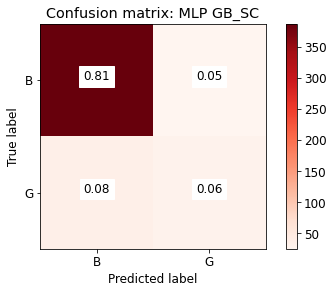

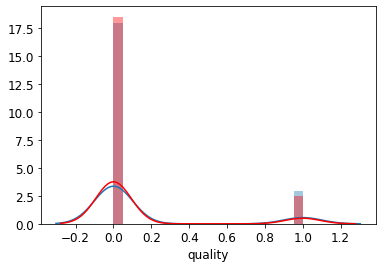

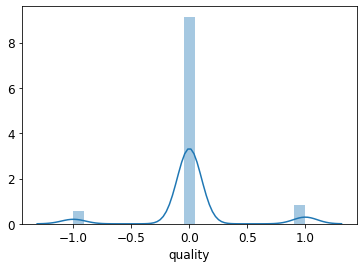

In [62]:
clf_SC = MLPClassifier(hidden_layer_sizes=(best_params_GB_SC["h"]), max_iter=maxiter, alpha=best_params_GB_SC["alpha"],solver=best_params_GB_SC["solver"],activation=best_params_GB_SC["mode"],tol=1e-9,verbose=False)
clf_SC.fit(X_train_GB_SC, Y_train)
Y_pred_GB_SC = clf_SC.predict(X_valid_GB_SC)
print("score: ",accuracy_score(Y_valid, Y_pred_GB_SC))
Statistic(Y_valid,Y_pred_GB_SC,"MLP GB_SC")

cm_mlp_SC = confusion_matrix(Y_valid, Y_pred_GB_SC)

# 480
Accuracy  =     0.871
Precision =     0.554
Recall    =     0.456
F1_score  =     0.500


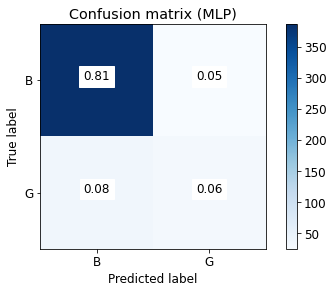

In [63]:
plot_confusion_matrix(cm_mlp_SC, ["B", "G"],
                          normalize = True,
                          title = 'Confusion matrix (MLP)',
                          cmap = plt.cm.Blues)
metrics_mlp_SC = show_metrics(cm_mlp_SC)

11 1e-05 relu
11 1e-05 identity
11 0.0001 relu
11 0.0001 identity
11 0.001 relu
11 0.001 identity
20 1e-05 relu
20 1e-05 identity
20 0.0001 relu
20 0.0001 identity
20 0.001 relu
20 0.001 identity
# 12 different combinations
params: dict_values([None, 11, None, 'auto', 1e-05, 'relu'])
params: dict_values([None, 11, None, 'auto', 1e-05, 'identity'])
params: dict_values([None, 11, None, 'auto', 0.0001, 'relu'])
params: dict_values([None, 11, None, 'auto', 0.0001, 'identity'])
params: dict_values([None, 11, None, 'auto', 0.001, 'relu'])
params: dict_values([None, 11, None, 'auto', 0.001, 'identity'])
params: dict_values([None, 20, None, 'auto', 1e-05, 'relu'])
params: dict_values([None, 20, None, 'auto', 1e-05, 'identity'])
params: dict_values([None, 20, None, 'auto', 0.0001, 'relu'])
params: dict_values([None, 20, None, 'auto', 0.0001, 'identity'])
params: dict_values([None, 20, None, 'auto', 0.001, 'relu'])
params: dict_values([None, 20, None, 'auto', 0.001, 'identity'])


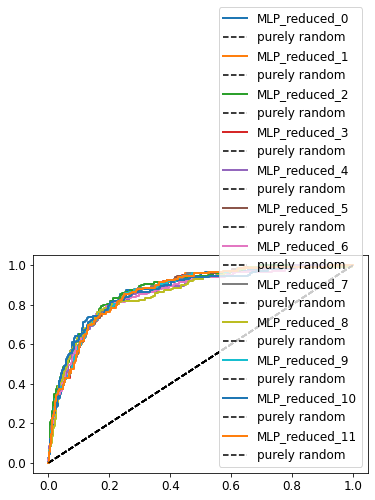

In [64]:
model_name = "MLP"
variation = "standart scale"

models_mlp = []
params = {"h": None, "alphas": None, "activations": None}
for i,j,k in itertools.product(h, alphas, activation):
    print(i,j,k)
    params["alphas"]= i
    params["activation"] = "auto"
    params["min_samples_split"] = j
    params["max_depth"] = k
    models_mlp.append(
        (MLPClassifier(hidden_layer_sizes=(i), max_iter=maxiter, alpha=j,solver="adam",activation=k,tol = 1e-9),
         model_name+"_"+variation, 
         params.copy())
    )
print(f"# {len(models_mlp)} different combinations")

cms_mlp_GB_SC, res_mlp_GB_SC = train_models_GB_SC(models_mlp, model_name, variation, x=X_train_GB_SC, y=Y_train)   
models_mlp_reduced = models_mlp

In [65]:
res_mlp_GB_SC

,model,accuracy,precision,recall,f1,traintime
0,MLP_reduced_0,0.882023,0.590874,0.410115,0.484174,12.833932
1,MLP_reduced_1,0.885610,0.620391,0.369425,0.463092,2.259654
2,MLP_reduced_2,0.889166,0.598566,0.382989,0.467104,12.740998
3,MLP_reduced_3,0.885614,0.611991,0.369425,0.460732,2.546583
4,MLP_reduced_4,0.889162,0.604253,0.368966,0.458168,12.767536
5,MLP_reduced_5,0.887404,0.629393,0.362759,0.460248,2.422858
6,MLP_reduced_6,0.876666,0.587609,0.463678,0.518339,13.947690
7,MLP_reduced_7,0.885618,0.621103,0.369195,0.463110,2.020356
8,MLP_reduced_8,0.883820,0.614444,0.510805,0.557852,13.980625
9,MLP_reduced_9,0.884717,0.634008,0.376092,0.472122,2.139496


<Figure size 576x432 with 0 Axes>

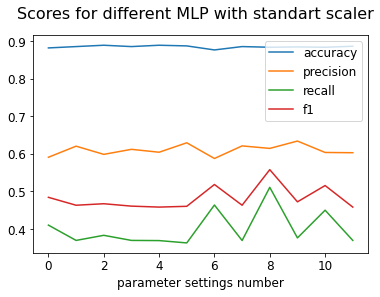

In [82]:
cols_scores = ["accuracy" , "precision", "recall", "f1"]
plt.figure(figsize=(8,6))
#plt.rcParams.update({'font.size': 14})
res_mlp_GB_SC[cols_scores].plot(fontsize=12)
plt.suptitle("Scores for different MLP with standart scaler", fontsize=16)
plt.xlabel("parameter settings number")
plt.savefig("figures//wine//scores_mlp_SC.png")

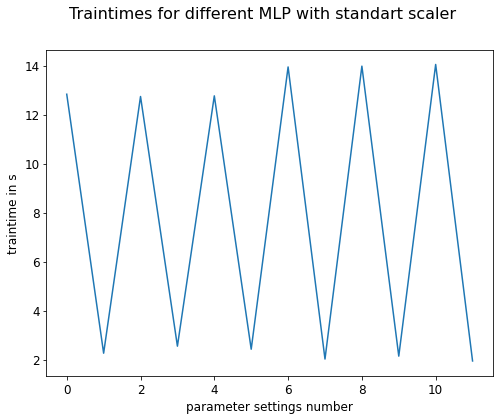

In [83]:
plt.figure(figsize=(8,6))
#plt.rcParams.update({'font.size': 14})
res_mlp_GB_SC["traintime"].plot(fontsize=12)
plt.suptitle("Traintimes for different MLP with standart scaler", fontsize=16)
plt.xlabel("parameter settings number")
plt.ylabel("traintime in s")
plt.savefig("figures//wine//time_mlp_SC.png")

## knn

In [104]:
# KNN Test
from sklearn.neighbors import KNeighborsClassifier

scores = []
best_score = 0
best_ks = []
ks = list(range(1, 10)) + list(range(10, 20, 2)) + list(range(20, 51, 4))
for k in ks:
    knn_SC = KNeighborsClassifier(n_neighbors=k)
    knn_SC.fit(X_train_GB_SC, Y_train)
    Y_pred = knn_SC.predict(X_train_GB_SC)
    score = accuracy_score(Y_train, Y_pred)
    scores.append(score)
    best_score = max(scores)
    if score == best_score:
        best_ks.append(k)
    score
best_score
best_ks.pop(0)
#best_ks.pop(0)
#best_ks

1

In [105]:
knn_SC = KNeighborsClassifier(n_neighbors=5)
knn_SC.fit(X_train_GB_SC, Y_train)
Y_pred = knn_SC.predict(X_train_GB_SC)
score_knn_SC = accuracy_score(Y_train, Y_pred)
cm_knn_SC = confusion_matrix(Y_train, Y_pred)
cm_knn_SC

array([[939,  31],
       [ 77,  72]])

In [106]:
# On train set
print("train set")
cross_val_metrics(knn_SC, X_train_GB_SC, Y_train)
# On traination set
print("-"*30)
print("traination set")
cross_val_metrics(knn_SC, X_train_GB_SC, Y_train)
# B...1 --> 66%
# M...0 --> 33%

train set
[accuracy] : 0.87491 (+/- 0.01774)
[precision] : 0.54839 (+/- 0.08550)
[recall] : 0.37011 (+/- 0.07652)
[f1] :  0.44195260659258195
------------------------------
traination set
[accuracy] : 0.87491 (+/- 0.01774)
[precision] : 0.54839 (+/- 0.08550)
[recall] : 0.37011 (+/- 0.07652)
[f1] :  0.44195260659258195


{'accuracy': 0.8749079115951313,
 'precision': 0.5483933085057059,
 'recall': 0.37011494252873567,
 'f1': 0.44195260659258195}

# 1119
Accuracy  =     0.903
Precision =     0.699
Recall    =     0.483
F1_score  =     0.571


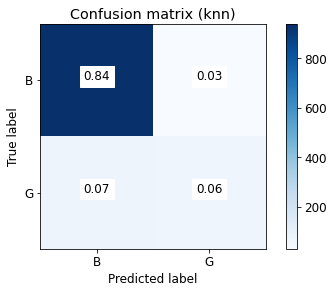

In [107]:
plot_confusion_matrix(cm_knn_SC,  ["B", "G"],
                          normalize = True,
                          title = 'Confusion matrix (knn)',
                          cmap = plt.cm.Blues)
metrics_knn_SC = show_metrics(cm_knn_SC)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40, 44, 48]


<Figure size 432x288 with 0 Axes>

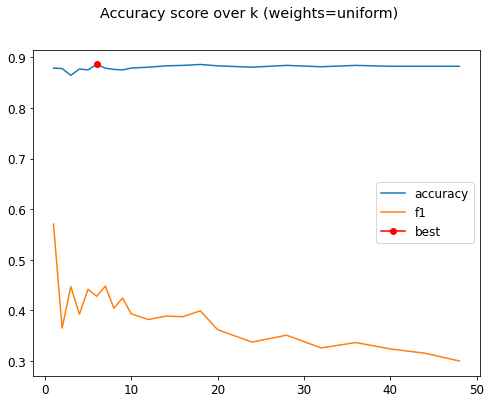

<Figure size 432x288 with 0 Axes>

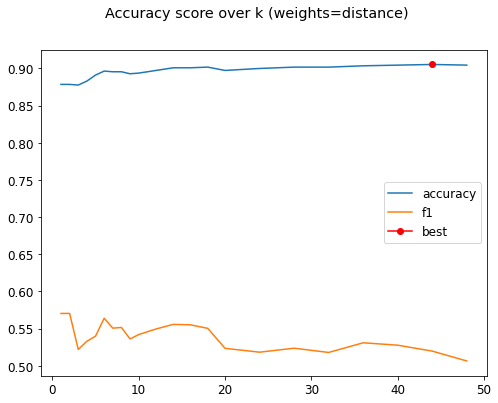

In [108]:
# KNN Test
from sklearn.neighbors import KNeighborsClassifier

ks = list(range(1, 10)) + list(range(10, 20, 2)) + list(range(20, 51, 4))
print(ks)
weights = ["uniform", "distance"]
metrics = []
for weight in weights:
    scores = []
    mets = []
    best_ks = []
    best_k = 0
    best_score = 0
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        #knn.fit(X_train, Y_train)
        #Y_pred = knn.predict(X_valid)
        #score = accuracy_score(Y_valid, Y_pred)
        metric = cross_val_metrics(knn, X_train_GB_SC, Y_train, cv=5, show=False)
        mets.append(metric)
        score = metric["accuracy"]
        scores.append(score)
        #best_score = max(scores)
        if score > best_score:
            best_k = k
            best_score= score
        score
    metrics.append(mets)
    best_score
    best_ks
    plt.clf()
    plt.figure(figsize=(8,6))
    plt.suptitle(f"Accuracy score over k (weights={weight})")
    plt.plot(ks, scores, label="accuracy")
    plt.plot(ks, [met["f1"] for met in mets], label="f1")
    plt.plot(best_k, best_score, marker="o", color="red", label="best")
    plt.legend()
    plt.savefig("figures//wine//knn//scores_k_{}_SC".format(weight))
    plt.show()